In [49]:
import numpy as np
import pandas as pd
import urllib.request
import json


In [50]:
#33.42632567356752, -111.93135542879193

In [51]:
url = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline' + \
  '/33.42632567356752,-111.93135542879193/2025-05-01/2025-06-9?unitGroup=metric&elements=datetimeEpoch,solarradiation' + \
  '&key=298LYYNTAZVEU5JN67C8W5AQE&contentType=json'

In [52]:
response = urllib.request.urlopen(url).read()

In [53]:
data = json.loads(response)
print(json.dumps(data, indent=2))

{
  "queryCost": 841,
  "latitude": 33.42632567356752,
  "longitude": -111.93135542879193,
  "resolvedAddress": "33.42632567356752,-111.93135542879193",
  "address": "33.42632567356752,-111.93135542879193",
  "timezone": "America/Phoenix",
  "tzoffset": -7.0,
  "days": [
    {
      "datetimeEpoch": 1746082800,
      "solarradiation": 283.0,
      "hours": [
        {
          "datetimeEpoch": 1746082800,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1746086400,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1746090000,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1746093600,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1746097200,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1746100800,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1746104400,
          "solarradiation": 21.0
     

In [54]:
from datetime import datetime
lists = []
for day in data['days']:
    for hour_data in day['hours']:
        time = datetime.fromtimestamp(hour_data['datetimeEpoch'])
        solar_radiation = [time, hour_data['solarradiation']]
        lists.append(solar_radiation)

In [55]:
lists

[[datetime.datetime(2025, 5, 1, 0, 0), 0.0],
 [datetime.datetime(2025, 5, 1, 1, 0), 0.0],
 [datetime.datetime(2025, 5, 1, 2, 0), 0.0],
 [datetime.datetime(2025, 5, 1, 3, 0), 0.0],
 [datetime.datetime(2025, 5, 1, 4, 0), 0.0],
 [datetime.datetime(2025, 5, 1, 5, 0), 0.0],
 [datetime.datetime(2025, 5, 1, 6, 0), 21.0],
 [datetime.datetime(2025, 5, 1, 7, 0), 160.0],
 [datetime.datetime(2025, 5, 1, 8, 0), 292.0],
 [datetime.datetime(2025, 5, 1, 9, 0), 582.0],
 [datetime.datetime(2025, 5, 1, 10, 0), 842.0],
 [datetime.datetime(2025, 5, 1, 11, 0), 893.0],
 [datetime.datetime(2025, 5, 1, 12, 0), 956.0],
 [datetime.datetime(2025, 5, 1, 13, 0), 942.0],
 [datetime.datetime(2025, 5, 1, 14, 0), 909.0],
 [datetime.datetime(2025, 5, 1, 15, 0), 394.0],
 [datetime.datetime(2025, 5, 1, 16, 0), 527.0],
 [datetime.datetime(2025, 5, 1, 17, 0), 192.0],
 [datetime.datetime(2025, 5, 1, 18, 0), 65.0],
 [datetime.datetime(2025, 5, 1, 19, 0), 18.0],
 [datetime.datetime(2025, 5, 1, 20, 0), 0.0],
 [datetime.datetime

In [56]:
df_solar = pd.DataFrame(lists, columns=['time', 'solar_radiation'])
df_solar

,time,solar_radiation
0,2025-05-01 00:00:00,0.0
1,2025-05-01 01:00:00,0.0
2,2025-05-01 02:00:00,0.0
3,2025-05-01 03:00:00,0.0
4,2025-05-01 04:00:00,0.0
...,...,...
955,2025-06-09 19:00:00,416.0
956,2025-06-09 20:00:00,181.0
957,2025-06-09 21:00:00,151.0
958,2025-06-09 22:00:00,120.0


<Axes: title={'center': 'Solar radiation'}, xlabel='Time', ylabel='Solar radiation (W/m2)'>

C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


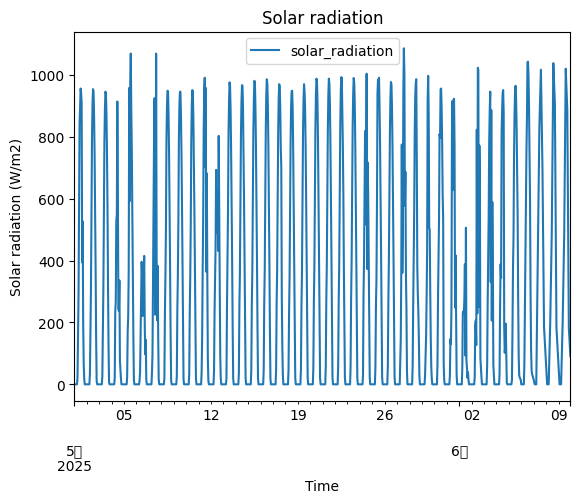

In [57]:
df_solar.set_index('time', inplace=True)
df_solar.plot(kind='line', title='Solar radiation', xlabel='Time', ylabel='Solar radiation (W/m2)')

In [58]:
efficiency = 0.20
area = 2
num_panels = 600
total_area = num_panels * area
print(total_area, 'm2')

1200 m2


In [59]:
df_solar['pv'] = df_solar['solar_radiation'] * efficiency * total_area / 1000
df_solar

,solar_radiation,pv
time,,
2025-05-01 00:00:00,0.0,0.00
2025-05-01 01:00:00,0.0,0.00
2025-05-01 02:00:00,0.0,0.00
2025-05-01 03:00:00,0.0,0.00
2025-05-01 04:00:00,0.0,0.00
...,...,...
2025-06-09 19:00:00,416.0,99.84
2025-06-09 20:00:00,181.0,43.44
2025-06-09 21:00:00,151.0,36.24


<Axes: title={'center': 'Solar Farm Power'}, xlabel='Time', ylabel='Solar radiation (W/m2)'>

C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


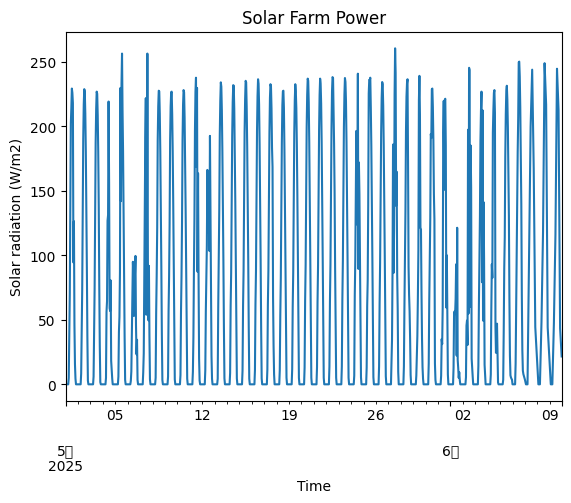

In [60]:
df_solar['pv'].plot(kind='line', title='Solar Farm Power', xlabel='Time', ylabel='Solar radiation (W/m2)')

In [61]:
# spain 42.59811552995308,-5.571933829892936

In [62]:
url = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline' + \
  '/42.59811552995308,-5.571933829892936/2025-05-01/2025-06-9?unitGroup=metric&elements=datetimeEpoch,solarradiation' + \
  '&key=298LYYNTAZVEU5JN67C8W5AQE&contentType=json'

In [63]:
response = urllib.request.urlopen(url).read()

In [64]:
data = json.loads(response)
print(json.dumps(data, indent=2))

{
  "queryCost": 865,
  "latitude": 42.59811552995308,
  "longitude": -5.571933829892936,
  "resolvedAddress": "42.59811552995308,-5.571933829892936",
  "address": "42.59811552995308,-5.571933829892936",
  "timezone": "Europe/Madrid",
  "tzoffset": 2.0,
  "days": [
    {
      "datetimeEpoch": 1746050400,
      "solarradiation": 219.1,
      "hours": [
        {
          "datetimeEpoch": 1746050400,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1746054000,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1746057600,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1746061200,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1746064800,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1746068400,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1746072000,
          "solarradiation": 0.0
        },
 

In [65]:
from datetime import datetime
lists = []
for day in data['days']:
    for hour_data in day['hours']:
        time = datetime.fromtimestamp(hour_data['datetimeEpoch'])
        solar_radiation = [time, hour_data['solarradiation']]
        lists.append(solar_radiation)

In [66]:
lists

[[datetime.datetime(2025, 4, 30, 15, 0), 0.0],
 [datetime.datetime(2025, 4, 30, 16, 0), 0.0],
 [datetime.datetime(2025, 4, 30, 17, 0), 0.0],
 [datetime.datetime(2025, 4, 30, 18, 0), 0.0],
 [datetime.datetime(2025, 4, 30, 19, 0), 0.0],
 [datetime.datetime(2025, 4, 30, 20, 0), 0.0],
 [datetime.datetime(2025, 4, 30, 21, 0), 0.0],
 [datetime.datetime(2025, 4, 30, 22, 0), 0.0],
 [datetime.datetime(2025, 4, 30, 23, 0), 21.2],
 [datetime.datetime(2025, 5, 1, 0, 0), 134.8],
 [datetime.datetime(2025, 5, 1, 1, 0), 272.5],
 [datetime.datetime(2025, 5, 1, 2, 0), 356.1],
 [datetime.datetime(2025, 5, 1, 3, 0), 445.1],
 [datetime.datetime(2025, 5, 1, 4, 0), 527.9],
 [datetime.datetime(2025, 5, 1, 5, 0), 653.2],
 [datetime.datetime(2025, 5, 1, 6, 0), 738.2],
 [datetime.datetime(2025, 5, 1, 7, 0), 635.7],
 [datetime.datetime(2025, 5, 1, 8, 0), 523.2],
 [datetime.datetime(2025, 5, 1, 9, 0), 379.4],
 [datetime.datetime(2025, 5, 1, 10, 0), 285.8],
 [datetime.datetime(2025, 5, 1, 11, 0), 197.7],
 [datetime

In [67]:
sdf_solar = pd.DataFrame(lists, columns=['time', 'solar_radiation'])
sdf_solar

,time,solar_radiation
0,2025-04-30 15:00:00,0.0
1,2025-04-30 16:00:00,0.0
2,2025-04-30 17:00:00,0.0
3,2025-04-30 18:00:00,0.0
4,2025-04-30 19:00:00,0.0
...,...,...
955,2025-06-09 10:00:00,553.0
956,2025-06-09 11:00:00,369.0
957,2025-06-09 12:00:00,184.0
958,2025-06-09 13:00:00,34.0


<Axes: title={'center': 'Solar radiation'}, xlabel='Time', ylabel='Solar radiation (W/m2)'>

C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


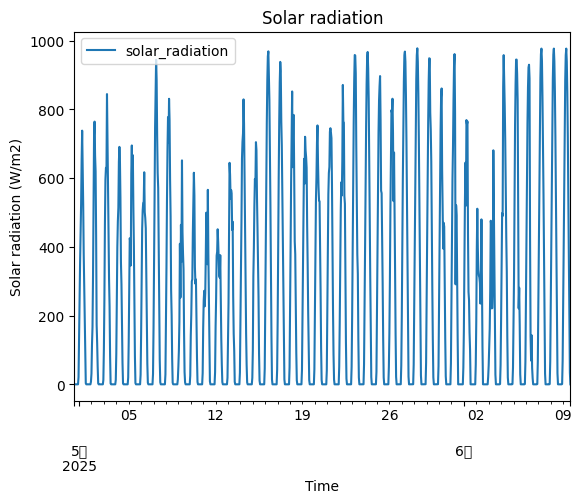

In [68]:
sdf_solar.set_index('time', inplace=True)
sdf_solar.plot(kind='line', title='Solar radiation', xlabel='Time', ylabel='Solar radiation (W/m2)')

In [69]:
sdf_solar['pv'] = sdf_solar['solar_radiation'] * efficiency * total_area / 1000
sdf_solar

,solar_radiation,pv
time,,
2025-04-30 15:00:00,0.0,0.00
2025-04-30 16:00:00,0.0,0.00
2025-04-30 17:00:00,0.0,0.00
2025-04-30 18:00:00,0.0,0.00
2025-04-30 19:00:00,0.0,0.00
...,...,...
2025-06-09 10:00:00,553.0,132.72
2025-06-09 11:00:00,369.0,88.56
2025-06-09 12:00:00,184.0,44.16


<Axes: title={'center': 'Solar Farm Power'}, xlabel='Time', ylabel='Solar radiation (W/m2)'>

C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


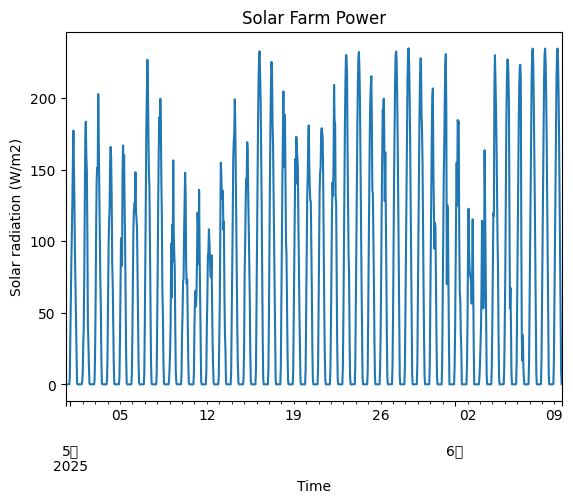

In [70]:
sdf_solar['pv'].plot(kind='line', title='Solar Farm Power', xlabel='Time', ylabel='Solar radiation (W/m2)')

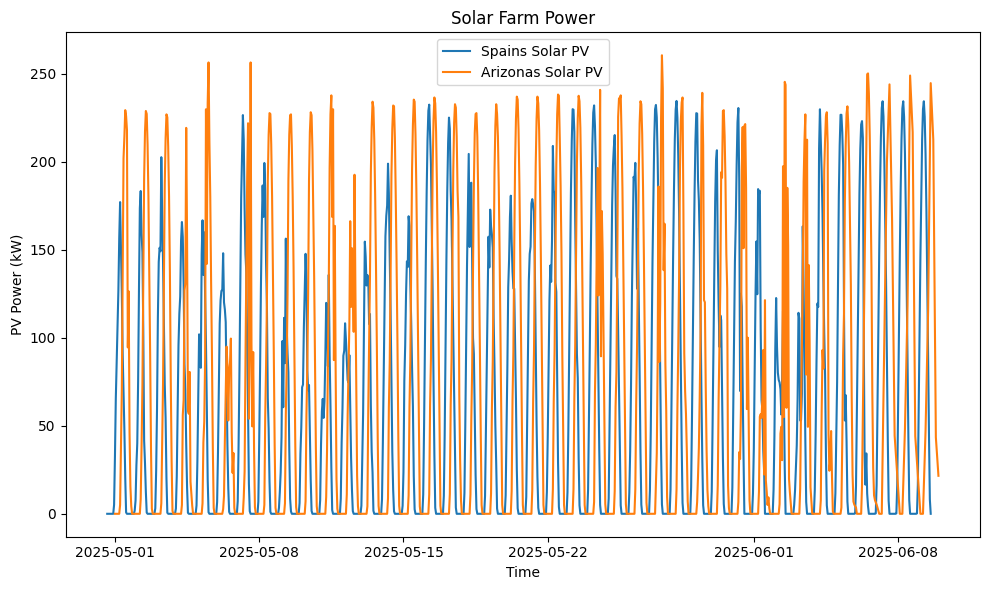

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(sdf_solar['pv'], label='Spains Solar PV')
plt.plot(df_solar['pv'], label='Arizonas Solar PV')

plt.title('Solar Farm Power')
plt.xlabel('Time')
plt.ylabel('PV Power (kW)')
plt.legend()
plt.tight_layout()
plt.savefig('solar_farm_power.png')
plt.show()

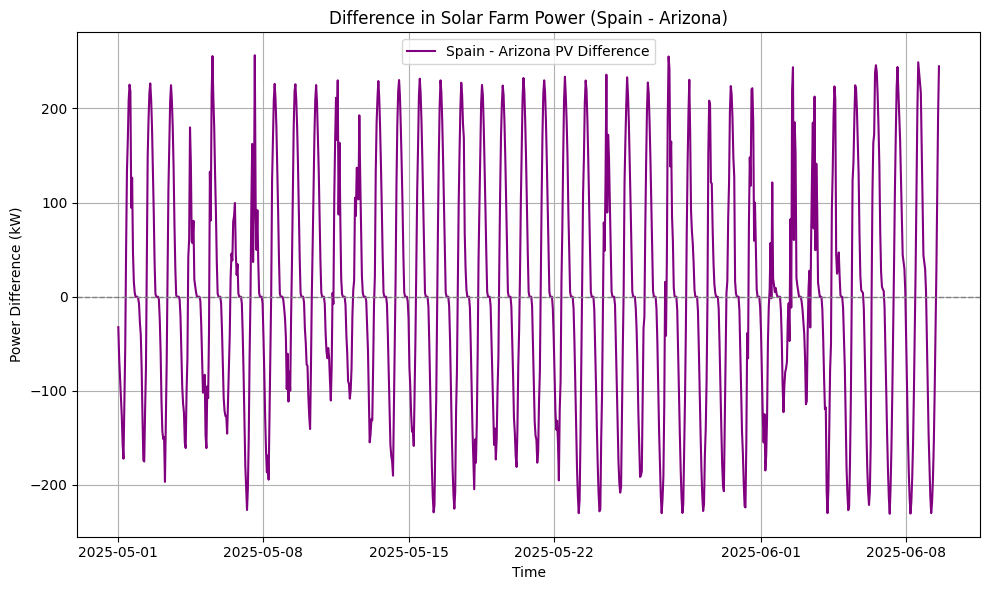

In [90]:
# Ensure both DataFrames use timezone-naive timestamps
df_solar.index = df_solar.index.tz_localize(None)
sdf_solar.index = sdf_solar.index.tz_localize(None)

# Find common timestamps
common_index = df_solar.index.intersection(sdf_solar.index)

# Compute the difference
pv_diff = df_solar.loc[common_index, 'pv'] - sdf_solar.loc[common_index, 'pv']

# Plot the difference
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(common_index, pv_diff, label='Spain - Arizona PV Difference', color='purple')

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Difference in Solar Farm Power (Spain - Arizona)')
plt.xlabel('Time')
plt.ylabel('Power Difference (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('solar_pv_difference.png')
plt.show()


In [72]:
print(df_solar.columns)

Index(['solar_radiation', 'pv'], dtype='object')


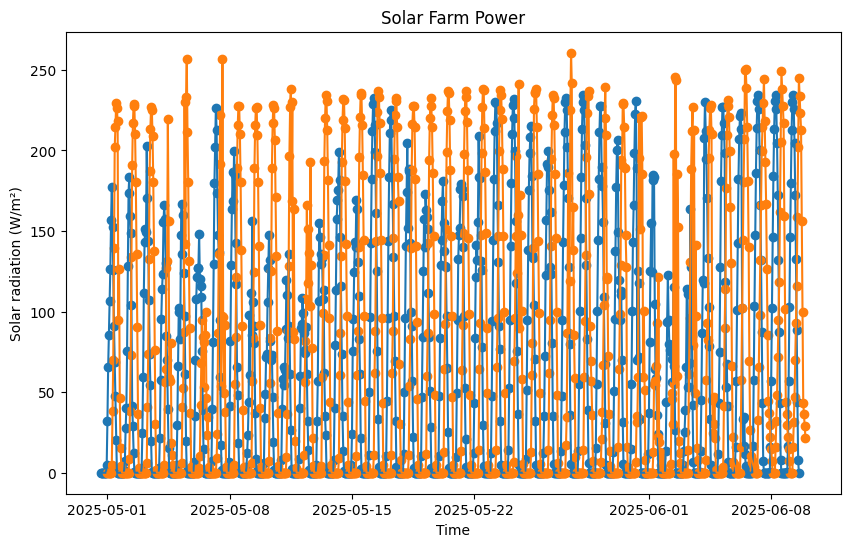

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(sdf_solar.index, sdf_solar['pv'])
plt.scatter(df_solar.index, df_solar['pv'])
plt.plot(sdf_solar['pv'], label='Spains Solar PV')
plt.plot(df_solar['pv'], label='Arizonas Solar PV')
plt.title('Solar Farm Power')
plt.xlabel('Time')
plt.ylabel('Solar radiation (W/m²)')
plt.show()

In [74]:
def simulate_battery_with_load(df, load_kw=500, capacity_kwh=10000, charge_eff=0.95, discharge_eff=0.95):
    battery = 0  # Initial state of charge (kWh)
    soc_list = []  # battery state of charge
    net_power_list = []  # power actually supplied to meet the load
    unmet_list = []  # unmet load when battery can't help

    for _, row in df.iterrows():
        pv = row['pv']  # solar power available this hour (kW)
        net = 0
        unmet = 0

        if pv >= load_kw:
            # Surplus power: use what we need, store excess
            surplus = pv - load_kw
            net = load_kw
            battery += min(surplus * charge_eff, capacity_kwh - battery)
        else:
            # Deficit: try to cover the gap from battery
            deficit = load_kw - pv
            possible_discharge = min(battery, deficit / discharge_eff)
            net = pv + possible_discharge * discharge_eff
            battery -= possible_discharge
            unmet = max(0, load_kw - net)  # if still below load

        soc_list.append(battery)
        net_power_list.append(net)
        unmet_list.append(unmet)

    df['battery_soc'] = soc_list
    df['net_power'] = net_power_list
    df['unmet_load'] = unmet_list
    return df


In [79]:
load_kw = 60  # Example load in kW

df_solar = simulate_battery_with_load(df_solar.copy(), load_kw=load_kw)
sdf_solar = simulate_battery_with_load(sdf_solar.copy(), load_kw=load_kw)


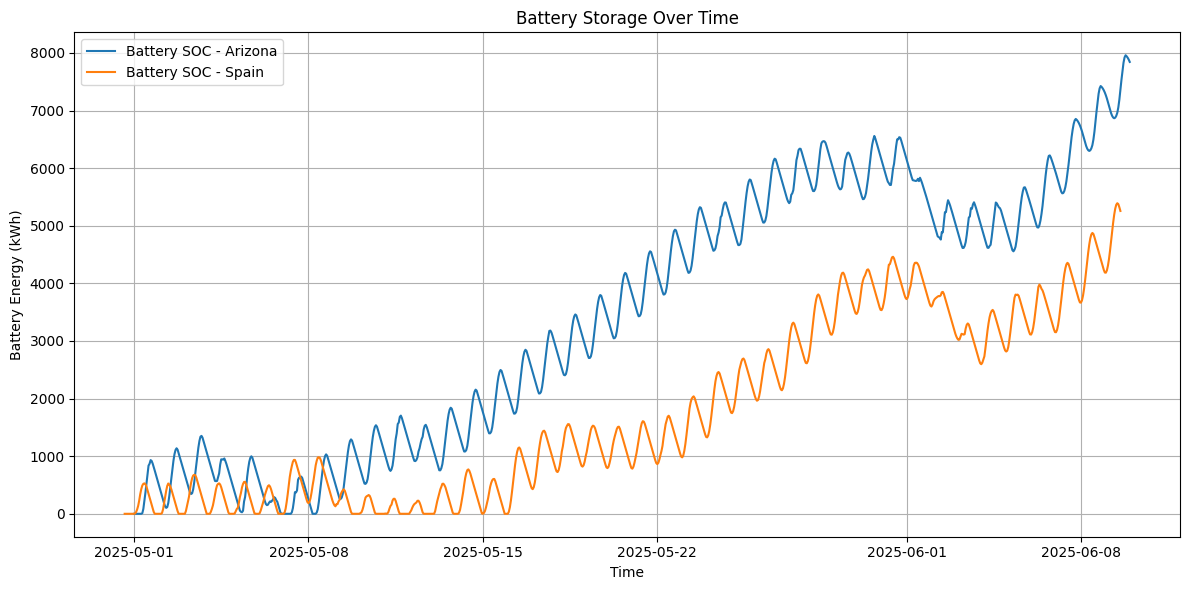

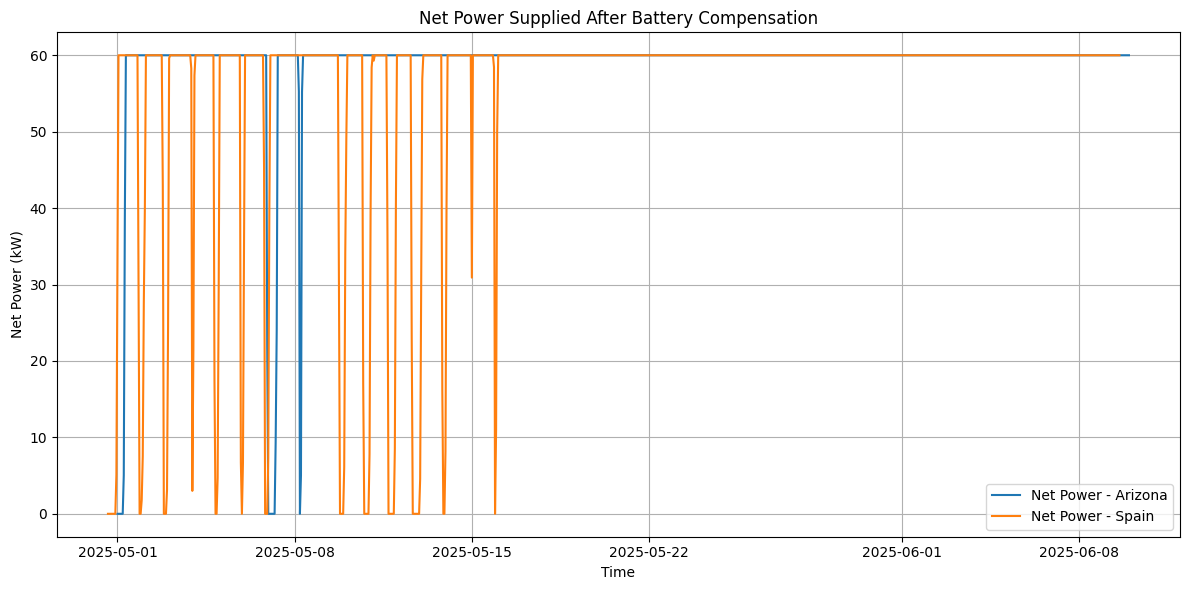

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(df_solar.index, df_solar['battery_soc'], label='Battery SOC - Arizona')
plt.plot(sdf_solar.index, sdf_solar['battery_soc'], label='Battery SOC - Spain')
plt.title('Battery Storage Over Time')
plt.xlabel('Time')
plt.ylabel('Battery Energy (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_solar.index, df_solar['net_power'], label='Net Power - Arizona')
plt.plot(sdf_solar.index, sdf_solar['net_power'], label='Net Power - Spain')
plt.title('Net Power Supplied After Battery Compensation')
plt.xlabel('Time')
plt.ylabel('Net Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
battery_capacity = 10000  # kWh

final_soc_arizona = df_solar['battery_soc'].iloc[-1]
final_soc_spain = sdf_solar['battery_soc'].iloc[-1]

percent_soc_arizona = (final_soc_arizona / battery_capacity) * 100
percent_soc_spain = (final_soc_spain / battery_capacity) * 100

print(f"Final Battery SOC - Arizona: {percent_soc_arizona:.2f}%")
print(f"Final Battery SOC - Spain: {percent_soc_spain:.2f}%")


Final Battery SOC - Arizona: 78.43%
Final Battery SOC - Spain: 52.57%


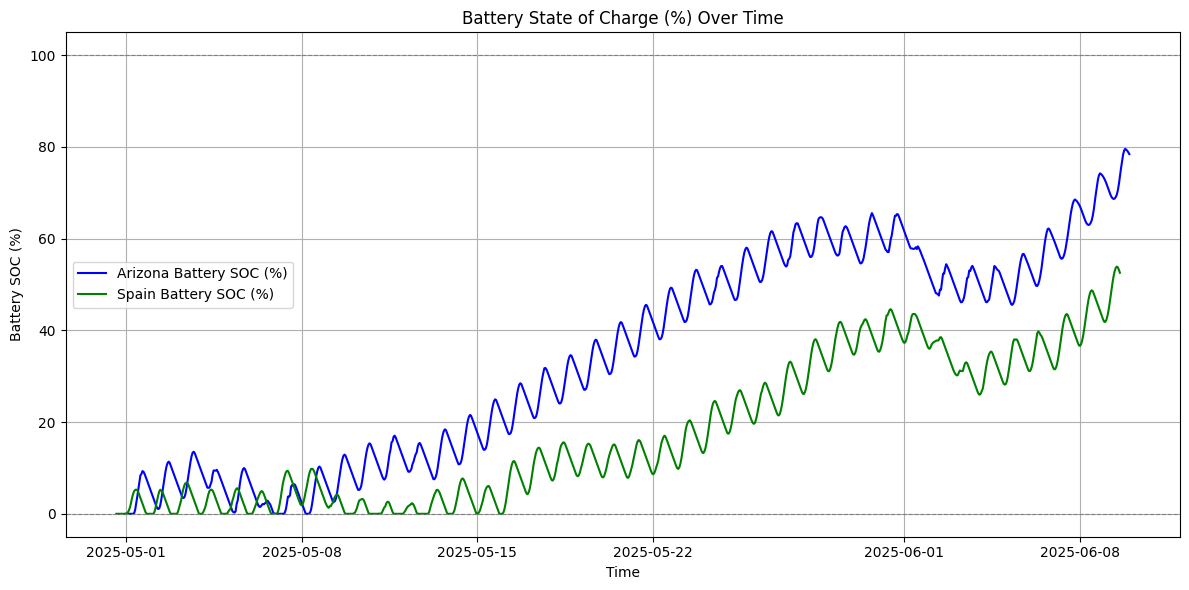

In [86]:
import matplotlib.pyplot as plt

battery_capacity = 10000  # kWh

# Convert absolute battery SOC to percentage
df_solar['battery_soc_percent'] = df_solar['battery_soc'] / battery_capacity * 100
sdf_solar['battery_soc_percent'] = sdf_solar['battery_soc'] / battery_capacity * 100

# Plot SOC %
plt.figure(figsize=(12, 6))
plt.plot(df_solar.index, df_solar['battery_soc_percent'], label='Arizona Battery SOC (%)', color='blue')
plt.plot(sdf_solar.index, sdf_solar['battery_soc_percent'], label='Spain Battery SOC (%)', color='green')
plt.axhline(100, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

plt.title('Battery State of Charge (%) Over Time')
plt.xlabel('Time')
plt.ylabel('Battery SOC (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('battery_soc_plot.jpg')
plt.show()


